In [55]:
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Auto-MPG dataset

http://archive.ics.uci.edu/ml/datasets/Auto+MPG


    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [56]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(url, names= column_names, delim_whitespace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [57]:
df.loc[df.horsepower == '?', 'horsepower'] = np.nan
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['full_date'] = pd.to_datetime(df.year, format='%y')
df['year'] = df['full_date'].dt.year
df.dtypes

mpg                    float64
cylinders                int64
displacement           float64
horsepower             float64
weight                 float64
acceleration           float64
year                     int64
origin                   int64
name                    object
full_date       datetime64[ns]
dtype: object

## Exercise 1

Create a time series line graph of average displacement per year, grouping the data per year.

## Exercise 2

Change the line style to dot and dash, the line width to 3 points and the color to red in the above graph.

## Exercise 3

Create a time series line graph of the average horsepower per year and set the correct axis labels, legends and title for the graph.

## Exercise 3.1

Create the same time series line graph of average horsepower per year using Seaborn lineplot. 

## Exercise 4

Create a scatter plot of horsepower per weight using the Matplotlib object oriented API, plotting directly from the created axis.

## Exercise 5

Create a scatter plot of horsepower per displacement and change the size of the marker to 3 points, the color to green and the marker to a triangle. Use the Pandas plotting API.

## Exercise 6

Create a scatter plot of horsepower per weight and change the image size to 20 by 10. Use the object oriented API with Pandas.

## Exercise 7

Create the same scatter plot of horsepower per weight, but now using Seaborn. Change the color of the markers with a hue based on the number of cylinders and the size of the markers based on the miles per gallon measurement (MPG).

## Exercise 8

Create a box plot of the variation of horsepower per cylinders using Seaborn.

## Exercise 8.1

Create the same boxplot as above, but now using the Pandas plotting API directly.

## Extra exercise

Add a new column in the dataframe with decade information and create a boxplot of horsepower per decade.

## Exercise 9

Create a histogram of displacement with 10 bins and gree color.

## Exercise 9.1

Create a histogram for horsepower and increase the number of bins to 20. Use the Pandas plotting API.

## Exercise 9.2

Create a histogram for horsepower but using Seaborn.

## Exercise 10

Create histogram for horsepower using the Matplotlib interactive API directly, with 15 bins.

## Exercise 11

List all available styles for Matplotlib.

## Exercise 12

Use the style`fivethirtyeight` and create a histogram for weight.

## Exercise 13

Create a multi line graph of average miles per gallon per cylinder, per year, and include title, legends and axis labels, changing the figure size to 10,8. Save the results to a PNG file. 

Hint:
Group the data per cylinders and year and average mpg, creating an intermediate dataframe. Then group by cylinder only and create a plot from it.

In [86]:
df_g = df.groupby(['year', 'cylinders'], as_index=False).mpg.mean()
df_g = df_g.set_index(df_g.year)

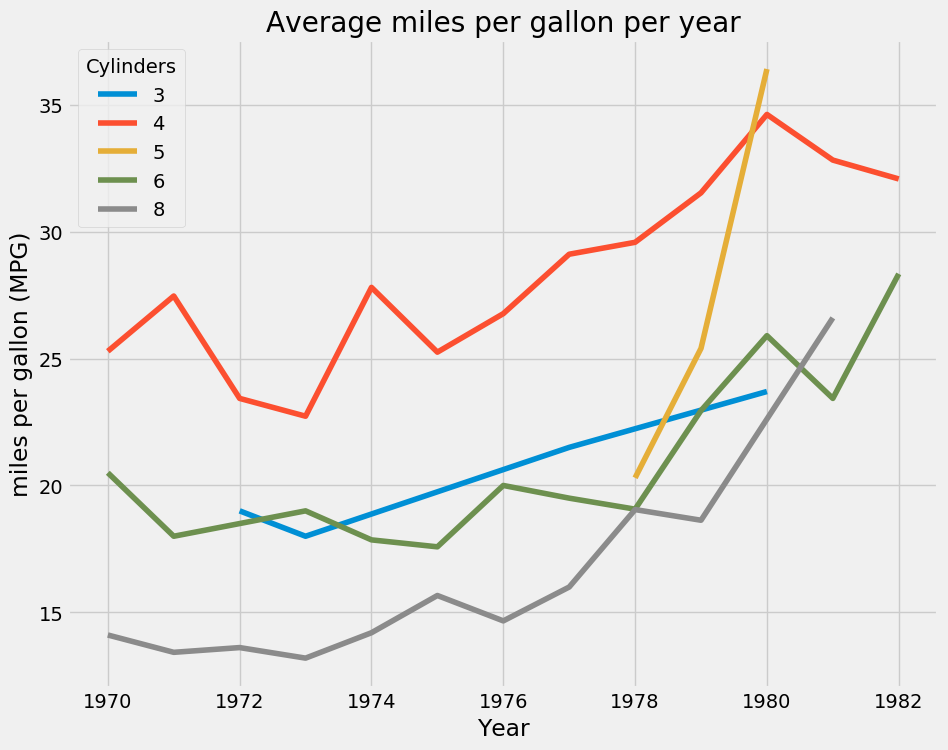

In [87]:
fig, axes = plt.subplots()
df_g.groupby('cylinders').mpg.plot(axes=axes, figsize=(10,8))
_ = axes.set(
    title="Average miles per gallon per year",
    xlabel="Year",
    ylabel="miles per gallon (MPG)"

)
axes.legend(title='Cylinders', fancybox=True)

fig.savefig('mpg_cylinder_year.png')